<a href="https://colab.research.google.com/github/yakupilyas/GoogleColabIntro/blob/main/Example2_Alien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install -q watermark

In [2]:
%load_ext watermark

%watermark -v -p cv2

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

cv2: 4.1.2



In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set_style("white")

rcParams['figure.figsize'] = 12, 10

In [50]:
!gdown --id 1-egRzmDqs5SyX7AhZ5IoLc2XfUfYM0XQ

Downloading...
From: https://drive.google.com/uc?id=1-egRzmDqs5SyX7AhZ5IoLc2XfUfYM0XQ
To: /content/alien.jpg
100% 65.2k/65.2k [00:00<00:00, 4.41MB/s]


In [51]:
img = cv2.imread(filename = 'alien.jpg', flags = cv2.IMREAD_COLOR)

In [52]:
h, w, channels = img.shape

print(f'height: {h}, width: {w}, color channels: {channels}')

height: 620, width: 900, color channels: 3


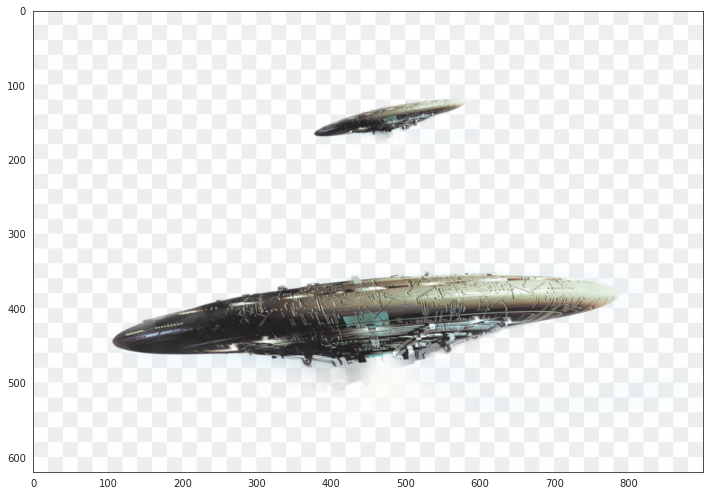

In [53]:

plt.imshow(cv2.cvtColor(src = img, code = cv2.COLOR_BGR2RGB));

In [54]:
def show_image(image, show_axis=True):
 plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
 if not show_axis:
    plt.axis('off');

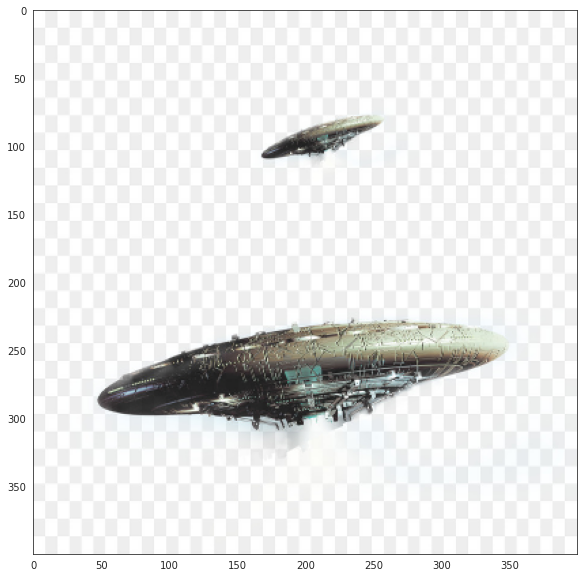

In [55]:

resize_width, resize_height = 400, 400

resized = cv2.resize(
 src = img,
 dsize=(resize_width, resize_height),
 interpolation=cv2.INTER_LANCZOS4
)

show_image(resized)

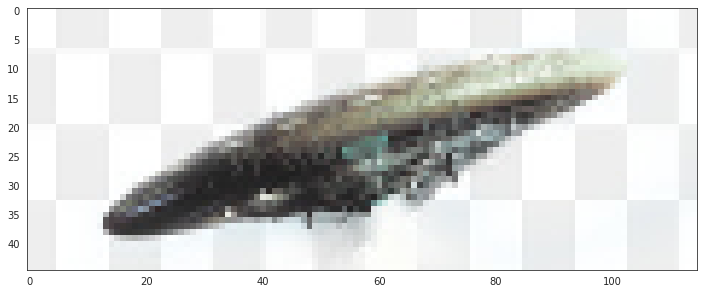

In [88]:
cropped = resized[70:115, 155:270]

show_image(cropped)

In [20]:
!gdown --id 1xLnaa5XdsFqTcEn_nq8-BqTeEAteOr0e


Downloading...
From: https://drive.google.com/uc?id=1xLnaa5XdsFqTcEn_nq8-BqTeEAteOr0e
To: /content/Tokat-Gaziosmanpasa-Universitesi-9-Sozlesmeli-Personel-Alimi-Yapacak.jpg
100% 135k/135k [00:00<00:00, 4.21MB/s]


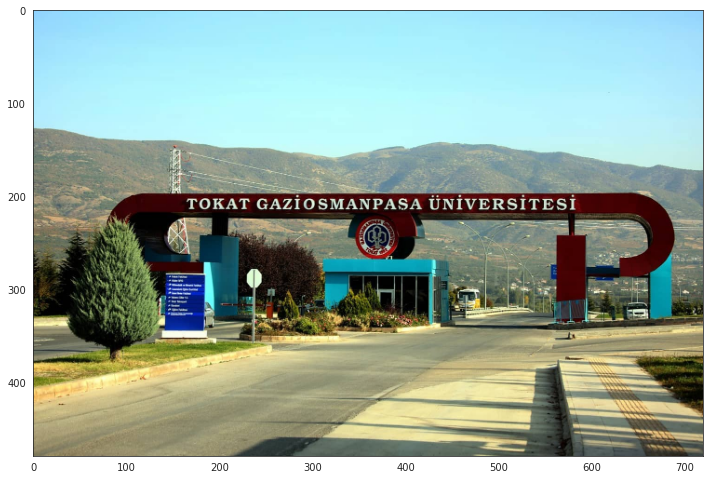

In [21]:
background = cv2.imread('Tokat-Gaziosmanpasa-Universitesi-9-Sozlesmeli-Personel-Alimi-Yapacak.jpg', cv2.IMREAD_COLOR)
h, w, _ = background.shape

background = cv2.resize(background, (w // 2, h // 2))

show_image(background)

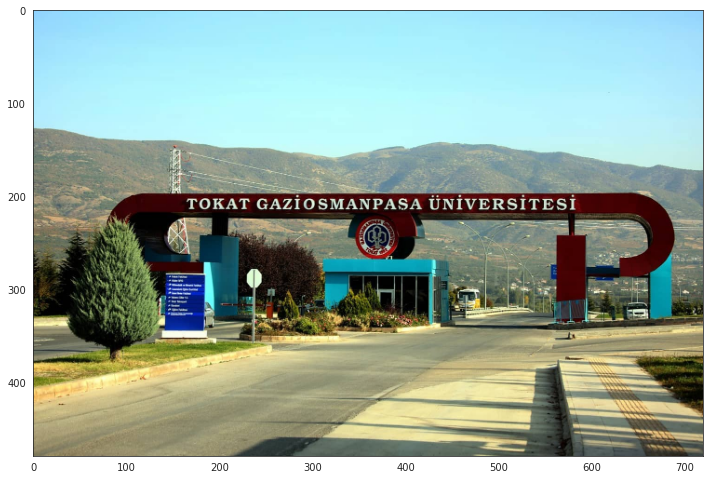

In [22]:
kernel_len = 1
blurred_background = cv2.GaussianBlur(
src = background,
ksize = (kernel_len, kernel_len),
sigmaX = 120,
sigmaY = 45
)

show_image(blurred_background)


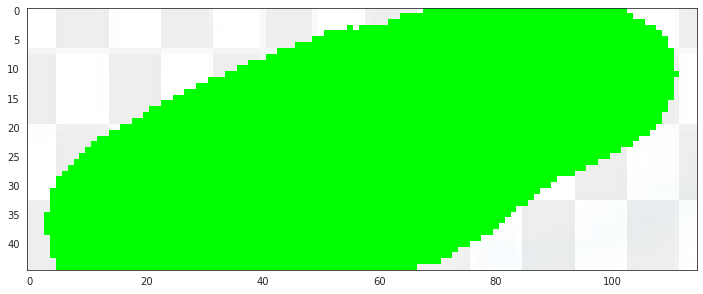

In [89]:
gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(
  src = gray,
  thresh = 225,
  maxval = 255, 
  type = cv2.THRESH_BINARY_INV
)

contours, _ = cv2.findContours(
  image = binary, 
  mode = cv2.RETR_EXTERNAL, 
  method = cv2.CHAIN_APPROX_SIMPLE
)

contour_img = cropped.copy()

show_image(
  cv2.drawContours(
    image = contour_img, 
    contours = contours, 
    contourIdx = -1, 
    color = (0, 255, 0), 
    thickness = 20
  )
)

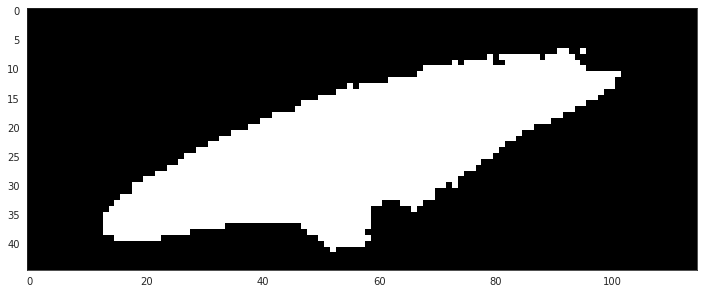

In [90]:
mask = np.zeros_like(cropped)
mask = cv2.drawContours(mask, contours, -1, (255, 255, 255), cv2.FILLED)

show_image(mask)

In [99]:
masked_alien = cv2.bitwise_and(
  src1 = cropped, 
  src2 = cropped, 
  mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
)


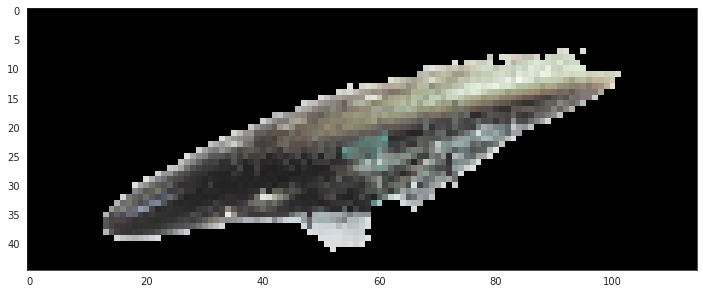

In [100]:
show_image(masked_alien)

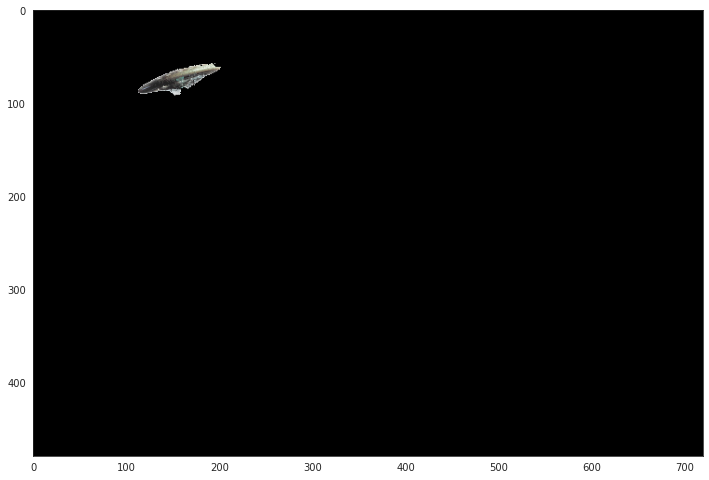

In [101]:
new_mask = np.zeros_like(blurred_background)
new_mask[
  50: 50 + masked_alien.shape[0],
  100: 100 + masked_alien.shape[1]
] = masked_alien

show_image(new_mask)

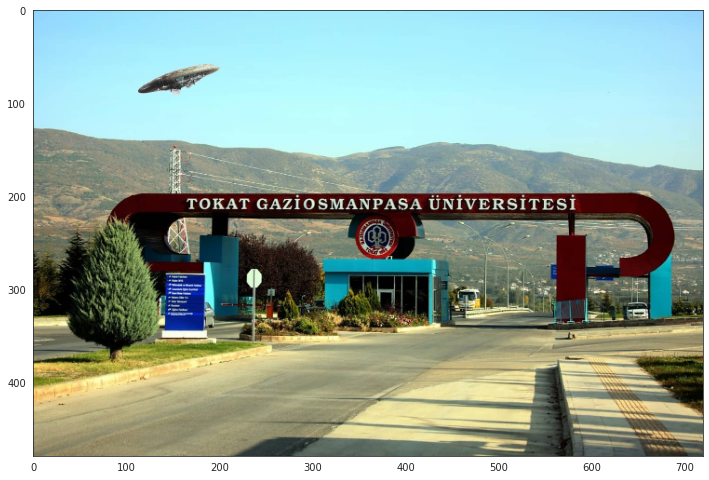

In [95]:
_, alpha = cv2.threshold(
  src = cv2.cvtColor(new_mask, cv2.COLOR_RGB2GRAY), 
  thresh = 0, 
  maxval = 255, 
  type = cv2.THRESH_BINARY
)
b, g, r = cv2.split(new_mask)
alpha_image = cv2.merge((b, g, r, alpha))
final_image = blurred_background.copy()
alpha_s = alpha_image[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
  final_image[:, :, c] = (alpha_s * alpha_image[:, :, c] +\
                          alpha_l * final_image[:, :, c])
show_image(final_image)

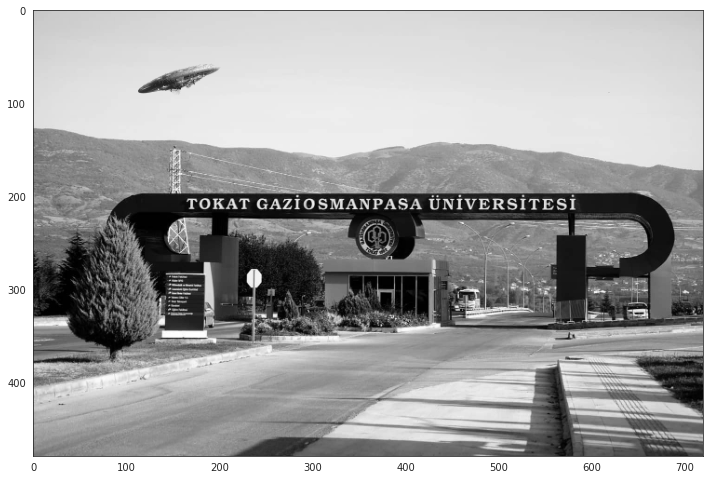

In [96]:
plt.imshow(cv2.cvtColor(src = final_image, code = cv2.COLOR_BGR2GRAY), cmap = 'gray');

In [104]:
cv2.imwrite('aliengray.jpg', cv2.cvtColor(src = final_image, code = cv2.COLOR_BGR2GRAY))

True